# Proyecto Final
# Faragó Facundo - Doctorovich Gustavo
# Uiversidad Nacional del Sur

# Importar librerias y dataset

In [2]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
import WholeBrain.Observables.FC as FC
import WholeBrain.Observables.swFCD as swFCD
import WholeBrain.Observables.phFCD as phFCD
import WholeBrain.Observables.GBC as GBC
import os
from Tests.Deco2018.setup import *

# Cargar datos
matriz_ts, matriz_conectividad_promedio,  numSampleSubjects = init()

# Inicializa una matriz para almacenar el promedio
promedio_matriz_ts = None

# Itera sobre las claves del diccionario
for key in matriz_ts.keys():
    matriz_actual = matriz_ts[key]
    # Si es la primera matriz, inicializa la matriz promedio
    if promedio_matriz_ts is None:
        promedio_matriz_ts = np.array(matriz_actual)
    else:
        # Sume la matriz actual a la matriz promedio
        promedio_matriz_ts += np.array(matriz_actual)

# Calcula el promedio dividiendo por el número de matrices
promedio_matriz_ts /= len(matriz_ts)

Going to use a matrix distance measure...
Going to use Functional Connectivity (FC)...
Going to use Sliding Windows Functional Connectivity Dynamics (swFCD)...
Going to use Phase-Interaction Matrix...
Going to use Phase Functional Connectivity Dynamics (phFCD)...
Going to use Global Brain Connectivity (GBC)...
Going to use the Euler-Maruyama Integrator...
Going to use Stephan2008 BOLD model...
Going to use the Balanced J9 (FIC) mechanism...
----------- Processing: EMOTION --------------
Loading Datos/Datasets/DataHCP80/hcp1003_EMOTION_LR_dbs80.mat
reading subject 0
reading subject 1
reading subject 2
reading subject 3
reading subject 4
reading subject 5
reading subject 6
reading subject 7
reading subject 8
reading subject 9
reading subject 10
reading subject 11
reading subject 12
reading subject 13
reading subject 14
reading subject 15
reading subject 16
reading subject 17
reading subject 18
reading subject 19
reading subject 20
reading subject 21
reading subject 22
reading subject 23


# Datos

## Matriz promedio de matrices de conectividad

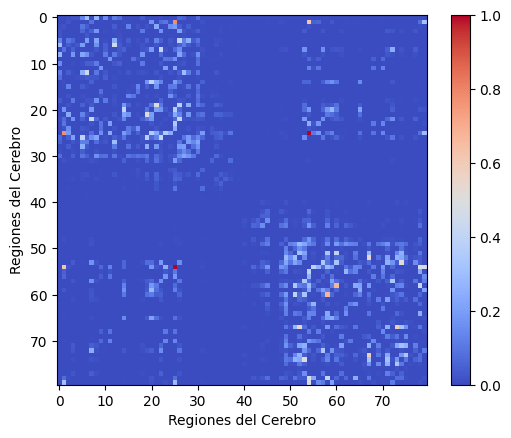

In [4]:
# Visualizar la matriz de conectividad promedio
plt.imshow(matriz_conectividad_promedio, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
#plt.title('Matriz de Conectividad Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## fRMI

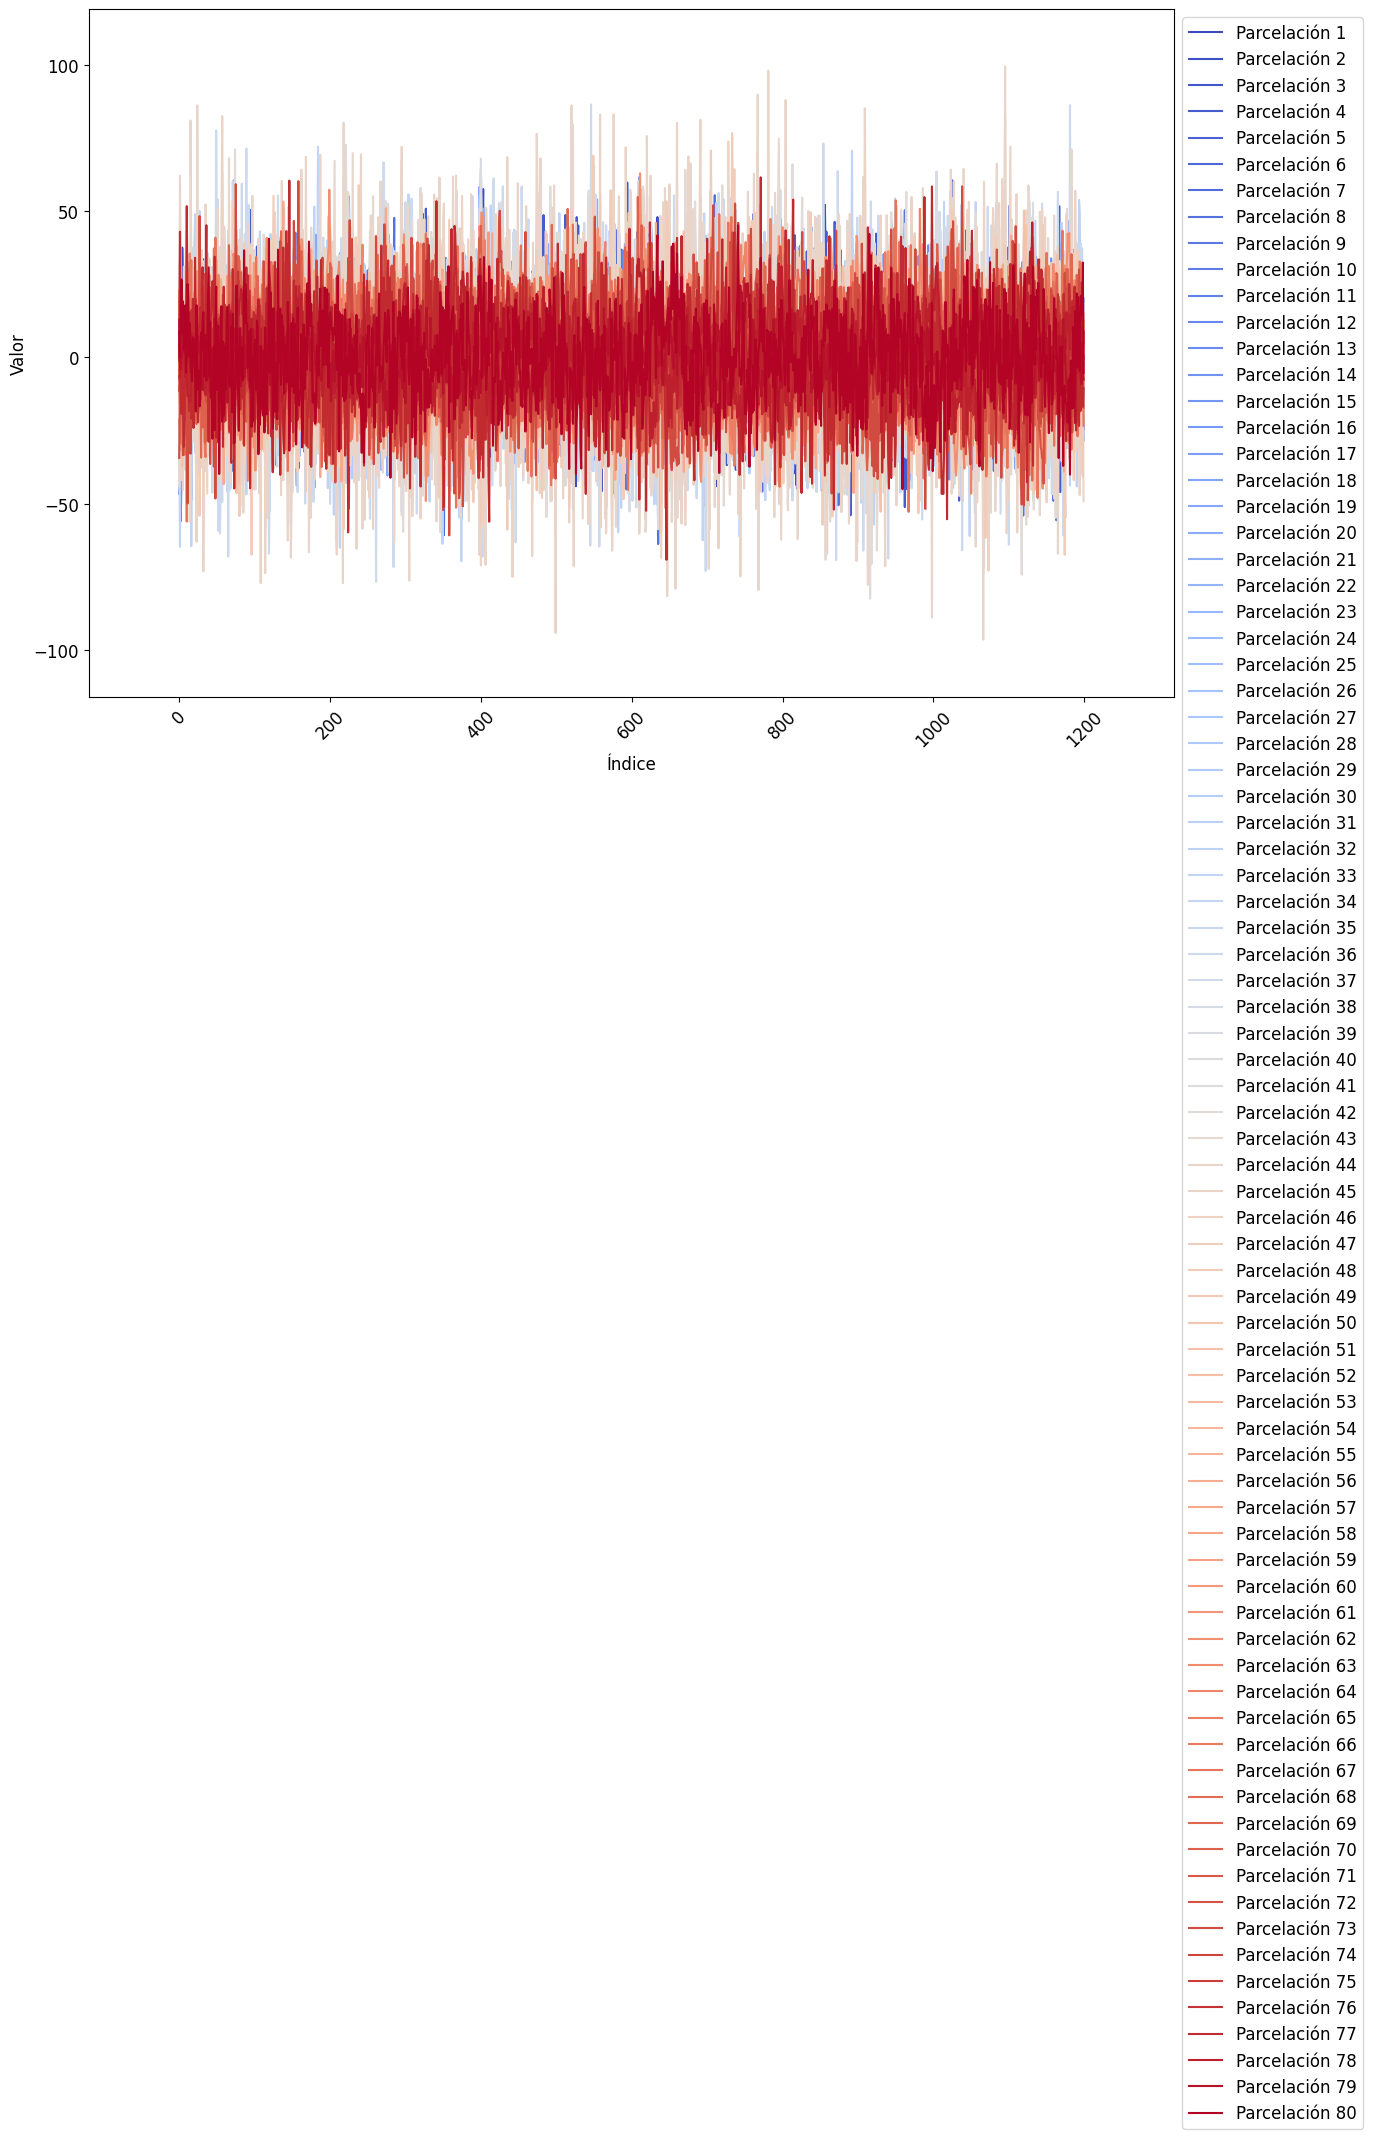

In [16]:
# Calcular el promedio de cada columna
promedios = np.mean(promedio_matriz_ts.T, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = promedio_matriz_ts.T - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

# Crear un gráfico con un tamaño más grande
plt.figure(figsize=(12, 8))

# Obtener el número de columnas y generar colores únicos para cada una de las regiones
num_columnas = matrizrp_detrended.shape[1]
colores = plt.cm.coolwarm(np.linspace(0, 1, num_columnas))

# Iterar sobre cada columna de la matriz y graficarla como una curva con un color distinto cada región
for i in range(num_columnas):
    plt.plot(matrizrp_detrended[:, i], color=colores[i], label=f'Parcelación {i+1}')

# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el tamaño de la fuente
plt.rcParams['font.size'] = 12

# Rotar las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45)

# Mejorar la disposición del gráfico
plt.tight_layout()

# Ajustar la posición de la leyenda fuera del área del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar los márgenes del gráfico
plt.margins(x=0.1, y=0.1)

# Mostrar el gráfico
plt.show()

## Correlacion (fMRI)

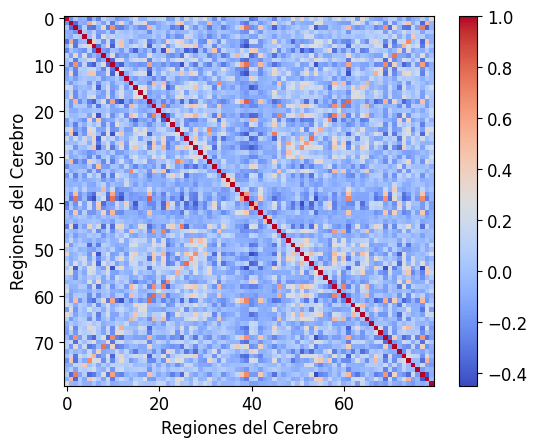

In [5]:
# Calcular el promedio de cada columna
promedios = np.mean(promedio_matriz_ts.T, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = promedio_matriz_ts.T - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

matriz_correlacion = np.corrcoef(matrizrp_detrended, rowvar=False)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
#plt.title('Matriz de Correlación')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')


# Mostrar la visualización
plt.show()


# Observables

## Functional Connectivity

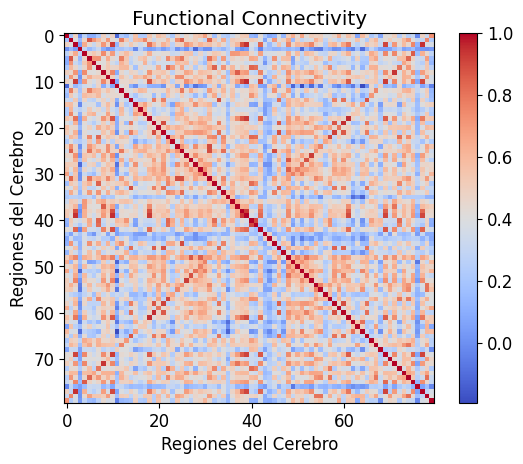

In [6]:
FC_mt = FC.from_fMRI(promedio_matriz_ts, True, True)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(FC_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Functional Connectivity')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## Sliding Window FCD


In [7]:
sw_FCD = swFCD.from_fMRI(promedio_matriz_ts,True,True)
sw_FCD_mt = swFCD.buildFullMatrix(sw_FCD)  

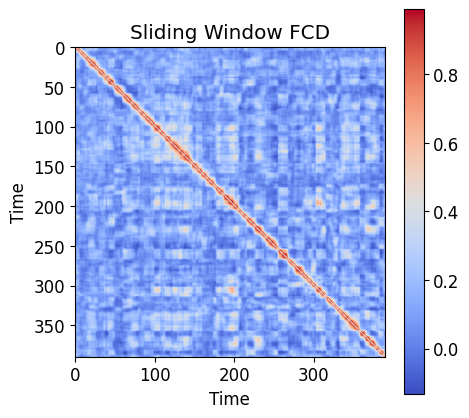

In [8]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(sw_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Sliding Window FCD')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show() 

## Phase Interaction Matrix

In [9]:
ph_FCD = phFCD.from_fMRI(promedio_matriz_ts,True,True)
ph_FCD_mt = phFCD.buildFullMatrix(ph_FCD)             

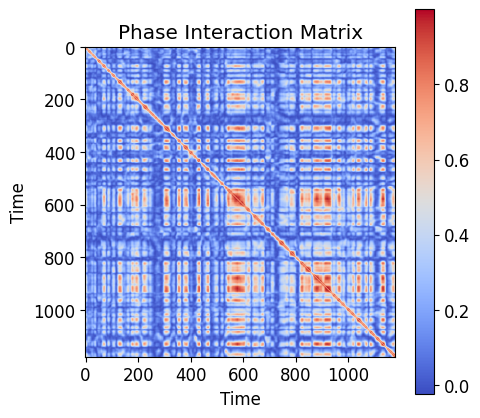

In [10]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(ph_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Phase Interaction Matrix')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show()   

## Global Brain Connectivity

In [11]:
FCD_mt = GBC.from_fMRI(promedio_matriz_ts,True,True)
GBC_mt = GBC.postprocess(FCD_mt) 

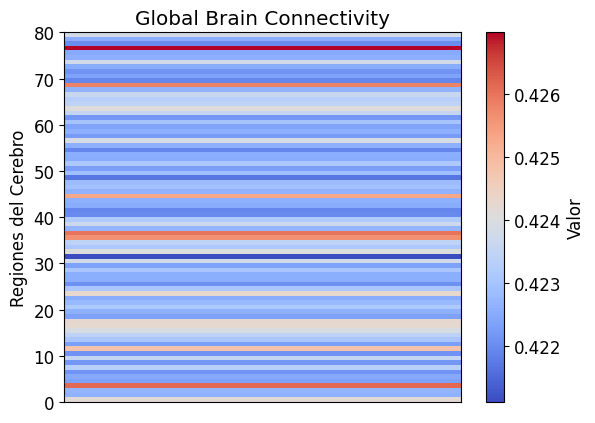

In [13]:
# Reformatear el vector a una matriz de una columna (25x1)
matriz = GBC_mt.reshape((80, 1))

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Mostrar la matriz como imagen
im = ax.imshow(matriz, cmap='coolwarm', aspect='auto', extent=[0, 1, 0, 80])

# Añadir una barra de color
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Valor')

# Ajustar las etiquetas del eje x
ax.set_xticks([])  # Desactivar las etiquetas del eje x

# Añadir etiquetas y título
plt.ylabel('Regiones del Cerebro')
plt.title('Global Brain Connectivity')

# Mostrar la visualización
plt.show()

# Resultados

## Figura Large-scale network

### Deco

Going to use the FIC mechanism in DecoEtAl2014...
=    simulating E-E (no FIC)         =
Processing: 0.0 => 3.0872350103153203
Processing: 0.1 => 3.3857597501238503
Processing: 0.2 => 3.750431069250255
Processing: 0.30000000000000004 => 4.198060957406488
Processing: 0.4 => 4.7671451702823004
Processing: 0.5 => 5.47292811930732
Processing: 0.6000000000000001 => 6.363231489778627
Processing: 0.7000000000000001 => 7.518104648286486
Processing: 0.8 => 8.955919791126144
Processing: 0.9 => 10.704242956913454
Processing: 1.0 => 12.745840032592232
Processing: 1.1 => 15.02544059793036
Processing: 1.2000000000000002 => 17.51266156972463
Processing: 1.3 => 20.136900370051418
Processing: 1.4000000000000001 => 22.850871829555636
Processing: 1.5 => 25.617115881102464
Processing: 1.6 => 28.397753016485776
Processing: 1.7000000000000002 => 31.195958517640637
Processing: 1.8 => 33.976378842306445
Processing: 1.9000000000000001 => 36.7504727161613
Processing: 2.0 => 39.524127508622364
Processing: 2.1 =>

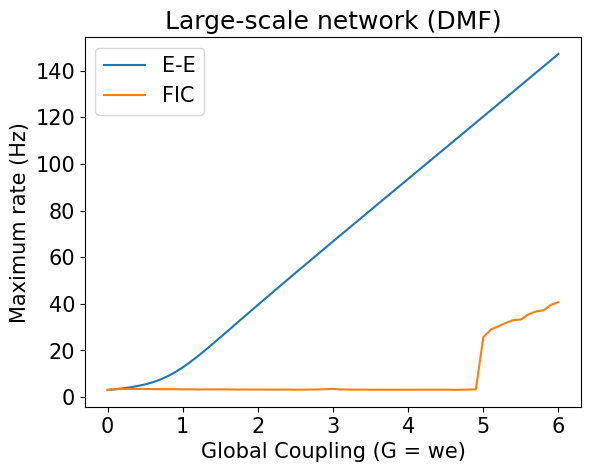

In [36]:
import Tests.fig_Deco as fig_Deco

# Carpeta destino
folder_path = 'Datos/Results/Results_Deco'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), wStep=0.1, wEnd= 6 + 0.001)

### Herzog

=    simulating E-E (no FIC)         =
Processing: 0.0 => 3.106138260020942
Processing: 0.2 => 3.6968087195714565
Processing: 0.4 => 4.701515819088213
Processing: 0.6000000000000001 => 6.274145951203809
Processing: 0.8 => 8.674501460063109
Processing: 1.0 => 12.350690783524929
Processing: 1.2000000000000002 => 16.79365072350723
Processing: 1.4000000000000001 => 21.913998693005734
Processing: 1.6 => 27.31949993745559
Processing: 1.8 => 32.77366135012965
Processing: 2.0 => 38.16528546201515
Processing: 2.2 => 43.605225024714144
Processing: 2.4000000000000004 => 48.96769744914334
Processing: 2.6 => 54.37343738246274
Processing: 2.8000000000000003 => 59.71599023933208
Processing: 3.0 => 65.08901471405703
Processing: 3.2 => 70.38728585614307
Processing: 3.4000000000000004 => 75.71364779830934
Processing: 3.6 => 81.05924001877574
Processing: 3.8000000000000003 => 86.33584905191724
Processing: 4.0 => 91.6676626253406
Processing: 4.2 => 97.0043566201752
Processing: 4.4 => 102.40334987134315
Pr

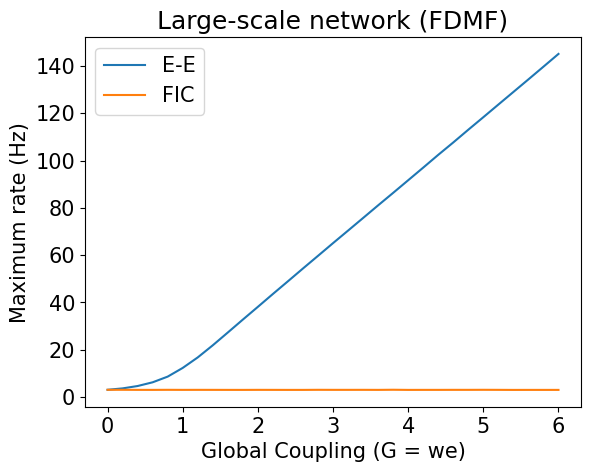

In [35]:
import Tests.fig_Herzog as fig_Herzog

# Carpeta destino
folder_path = 'Datos/Results/Results_Herzog'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), wStep=0.2, wEnd= 6 + 0.001)

### Naskar

#### Datos Naskar

In [ ]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

# fig_Naskar.integrator.clamping = True
# fig_Naskar.integrator.clamping_max = 2

# Cargo SC
SC = sio.loadmat('Datos/Datasets/StructuralConnectivity/avgSC68.mat')

# Carpeta destino
folder_path = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Naskar.plotMaxFrecForAllWe(SC['avgSC40'], fileName=os.path.join(folder_path, 'results_{}.txt'), wEnd=1.5, wStep=0.2)

#### Nuevos datos (80x80)

##### DecoEtAl_2014

In [ ]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

inFilePath = 'Datos/Datasets/DataHCP80/'
outFilePath = 'Datos/Results/Results_80x80/'

SC_path = inFilePath + 'SC_dbs80HARDIFULL.mat'
sc80 = sio.loadmat(SC_path)['SC_dbs80FULL']
C = sc80/np.max(sc80)  # Normalization...

fig_Naskar.plotMaxFrecForAllWe(C, fileName=os.path.join(outFilePath , 'results_{}.txt'), wEnd=6, wStep=0.2)    

##### NaskarEtAl_2018

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler integraation scheme...
=    simulating Naskar               =

Processing: 0.0  

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\Euler.py:30: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


maxRateFIC => 3.161333469496898

Processing: 0.2  maxRateFIC => 3.0945247769440276

Processing: 0.4  maxRateFIC => 3.072453409556735

Processing: 0.6000000000000001  maxRateFIC => 3.1256443713821236

Processing: 0.8  maxRateFIC => 12.373060708261026

Processing: 1.0  maxRateFIC => 19.592761277742767

Processing: 1.2000000000000002  maxRateFIC => 24.96205176862937

Processing: 1.4000000000000001  maxRateFIC => 30.40715990878755


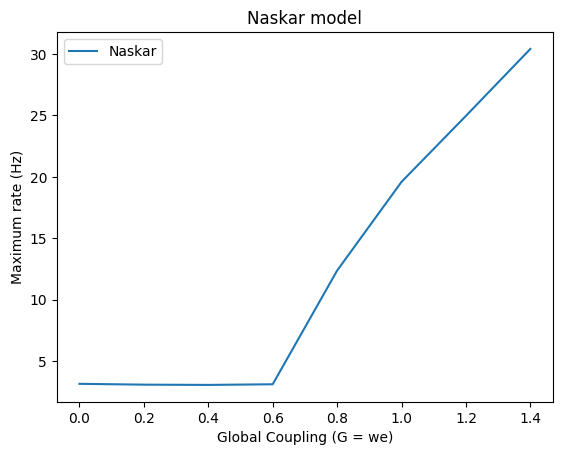

In [3]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

inFilePath = 'Datos/Datasets/DataHCP80/'
outFilePath = 'Datos/Results/Results_80x80/'

SC_path = inFilePath + 'SC_dbs80HARDIFULL.mat'
sc80 = sio.loadmat(SC_path)['SC_dbs80FULL']
C = sc80/np.max(sc80)  # Normalization...

fig_Naskar.plotMaxFrecForAllWe(C, fileName=os.path.join(outFilePath , 'results_{}.txt'), wEnd=1.4+0.001, wStep=0.1)    

### Naskar - Deco - Herzog

Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Dynamic Mean Field (DMF) neuronal model...
Going to use the Euler integraation scheme...
Going to use the FIC mechanism in DecoEtAl2014...
Going to use the Balanced J (FIC) mechanism in HerzogEtAl2022...
=    simulating Naskar               =

Processing: 0.1  

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\Euler.py:30: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


maxRateFIC => 3.0087593855072203

Processing: 0.2  maxRateFIC => 3.0087593631386027

Processing: 0.30000000000000004  maxRateFIC => 3.008759340798513

Processing: 0.4  maxRateFIC => 3.008759318547591

Processing: 0.5  maxRateFIC => 3.008759296437337

Processing: 0.6  maxRateFIC => 3.0087592745131815

Processing: 0.7000000000000001  maxRateFIC => 3.0087592528137086

Processing: 0.8  maxRateFIC => 3.0087592324313577

Processing: 0.9  maxRateFIC => 3.008759213357367

Processing: 1.0  maxRateFIC => 3.0087591952215593

Processing: 1.1  maxRateFIC => 3.008759178082822

Processing: 1.2000000000000002  maxRateFIC => 3.008759161992409

Processing: 1.3000000000000003  maxRateFIC => 3.008759146995465

Processing: 1.4000000000000001  maxRateFIC => 3.0087591331310812

Processing: 1.5000000000000002  maxRateFIC => 3.008759120433411

Processing: 1.6  maxRateFIC => 3.0087591089322396

Processing: 1.7000000000000002  maxRateFIC => 3.008759098652269

Processing: 1.8000000000000003  maxRateFIC => 3.00875

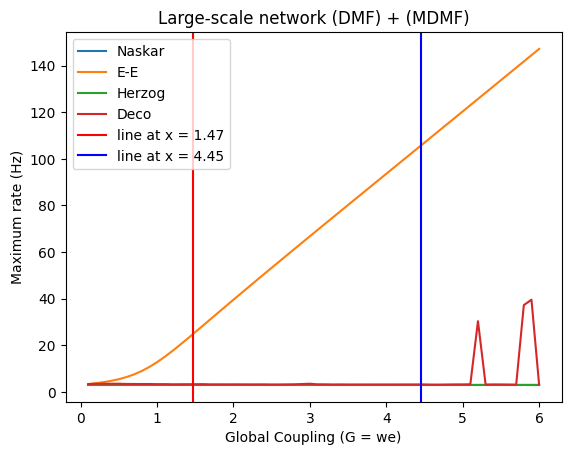

In [2]:
import Tests.fig_NDH as fig_NDH

# Carpeta destino
folder_path_h = 'Datos/Results/Results_Herzog'
folder_path_d = 'Datos/Results/Results_Deco'

# Calculo DMF
fig_NDH.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName_H=os.path.join(folder_path_h, 'results_{}.txt'), fileName_D=os.path.join(folder_path_d, 'results_{}.txt'), wStep= 0.1, wEnd = 6+0.001)

plt.show()

## Optimizacion de variables

### G optimo

In [9]:
import Tests.Deco2018.prepro as prepro
import WholeBrain.Models.Naskar as Naskar

outFilePath = 'Datos/Results/Results_G/'
inFilePath = 'Datos/Datasets/DataHCP80/'
prepro.outFilePath = outFilePath 
prepro.inFilePath = inFilePath

J_fileNames = outFilePath + "results_{}.txt"
prepro.prepro_Optim(neuronalModel= Naskar, M_e_optim= 1, M_i_optim= 1, J_fileNames= J_fileNames,numSampleSubjects= 10 , Step= 0.05, End=6.5+0.001, Start=5.8)

----------- Processing: EMOTION --------------
Loading Datos/Datasets/DataHCP80/hcp1003_EMOTION_LR_dbs80.mat
reading subject 0
reading subject 1
reading subject 2
reading subject 3
reading subject 4
reading subject 5
reading subject 6
reading subject 7
reading subject 8
reading subject 9
reading subject 10
reading subject 11
reading subject 12
reading subject 13
reading subject 14
reading subject 15
reading subject 16
reading subject 17
reading subject 18
reading subject 19
reading subject 20
reading subject 21
reading subject 22
reading subject 23
reading subject 24
reading subject 25
reading subject 26
reading subject 27
reading subject 28
reading subject 29
reading subject 30
reading subject 31
reading subject 32
reading subject 33
reading subject 34
reading subject 35
reading subject 36
reading subject 37
reading subject 38
reading subject 39
reading subject 40
reading subject 41
reading subject 42
reading subject 43
reading subject 44
reading subject 45
reading subject 46
reading 

Loading Datos/Results/Results_G/DecoEtAl2018_fneuro.mat


#####################################################
# Max FC(5.8) = 0.26058141383058697 
  Min FCD(5.949999999999999) = 0.0913892138100234 
  Min phFCD(6.299999999999998) = 0.04275325152057863
#####################################################


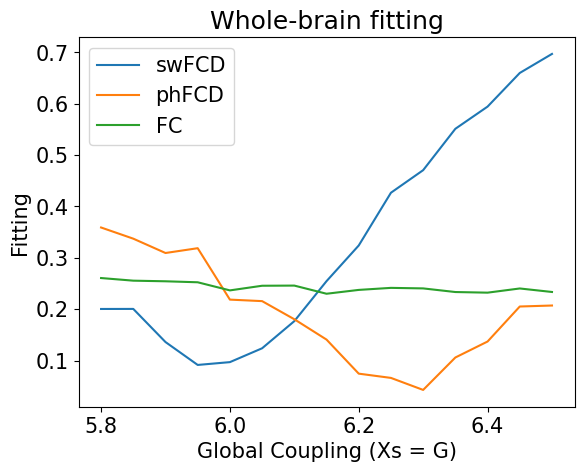

In [10]:
import Tests.Deco2018.plot as fig_optim
fig_optim.plot_optim('Datos/Results/Results_G/DecoEtAl2018_fneuro.mat', x= 'G')

### M_e Optimo

In [15]:
import Tests.Deco2018.prepro as prepro
import Models.Naskar as Naskar
import Tests.Deco2018.plot as fig_optim
from Tests.Deco2018.setup import *

# Estados de interés
estados = ['REST', 'GAMBLING', 'SOCIAL']
numSampleSubjects = 10
x= 'M_e'

for estado in estados:
    outFilePath = f'Datos/Results/Results_Me_{estado}/'
    inFilePath = 'Datos/Datasts/DataHCP80/'
    prepro.outFilePath = outFilePath 
    prepro.inFilePath = inFilePath
    
    J_fileNames = outFilePath + "results_{}.txt"
    prepro.prepro_Optim_Individual(neuronalModel= Naskar, selectedTask= estado,outFilePath = outFilePath, M_i_optim=1, G_optim= 6.3, 
                                   numSampleSubjects= numSampleSubjects , Start= 0.9, Step= 0.01, End=1.1 +0.001, 
                                   J_fileNames=J_fileNames, distanceSettings = {'phFCD': (phFCD, True)})
    
    for i in range(numSampleSubjects):
    filePath = outFilePath + f'Subject{i}/DecoEtAl2018_fneuro.mat'
    fig_optim.plot_optim(filePath , x)
    fNeuro = sio.loadmat(filePath)
    Xs = fNeuro[x].flatten()
    phFCD_fitt = fNeuro['phFCD_fitt'].flatten()
    minphFCD = Xs[np.argmin(phFCD_fitt)]
    prepro.save_J(M_i_optim= 1, M_e_optim=minphFCD, G_optim=6.3, Path= outFilePath+ f'Subject{i}/')

----------- Processing: EMOTION --------------
Loading Datos/Datasets/DataHCP80/hcp1003_EMOTION_LR_dbs80.mat
reading subject 0
reading subject 1
reading subject 2
reading subject 3
reading subject 4
reading subject 5
reading subject 6
reading subject 7
reading subject 8
reading subject 9
reading subject 10
reading subject 11
reading subject 12
reading subject 13
reading subject 14
reading subject 15
reading subject 16
reading subject 17
reading subject 18
reading subject 19
reading subject 20
reading subject 21
reading subject 22
reading subject 23
reading subject 24
reading subject 25
reading subject 26
reading subject 27
reading subject 28
reading subject 29
reading subject 30
reading subject 31
reading subject 32
reading subject 33
reading subject 34
reading subject 35
reading subject 36
reading subject 37
reading subject 38
reading subject 39
reading subject 40
reading subject 41
reading subject 42
reading subject 43
reading subject 44
reading subject 45
reading subject 46
reading 

D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\EulerMaruyama.py:36: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)

KeyboardInterrupt



#### Solo Graficos (Correr antes Prepro_Optim)

Loading Datos/Results/Results_Me_SOCIAL/Subject0/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(0.99) = 0.05769215880224206
#####################################################


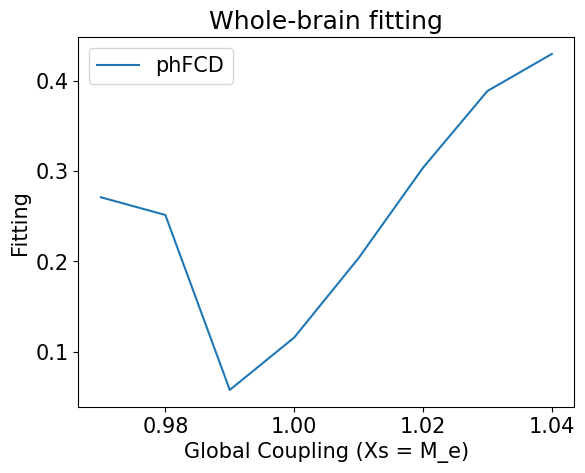

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject0/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject1/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(0.99) = 0.0860095381371977
#####################################################


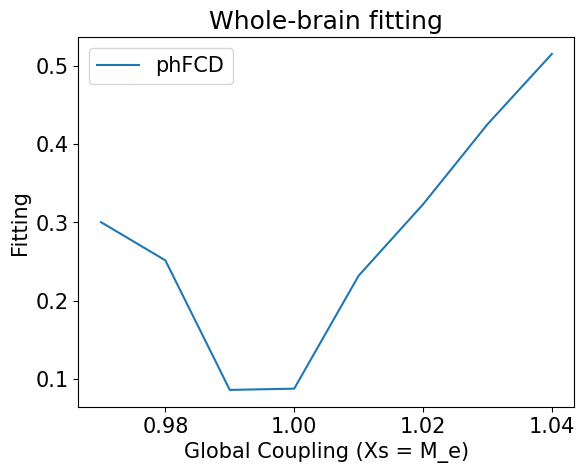

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject1/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject2/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(1.02) = 0.11580749568723667
#####################################################


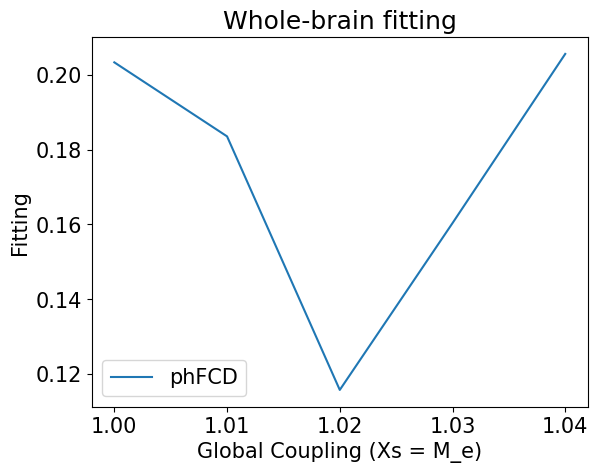

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject2/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject3/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(1.1600000000000001) = 0.10579167295170994
#####################################################


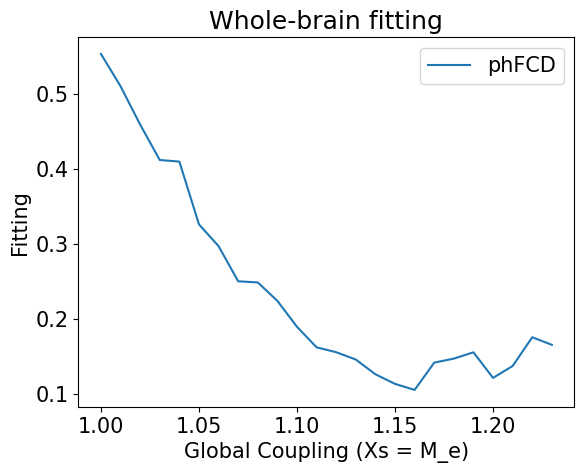

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject3/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject4/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(1.01) = 0.04140419658458516
#####################################################


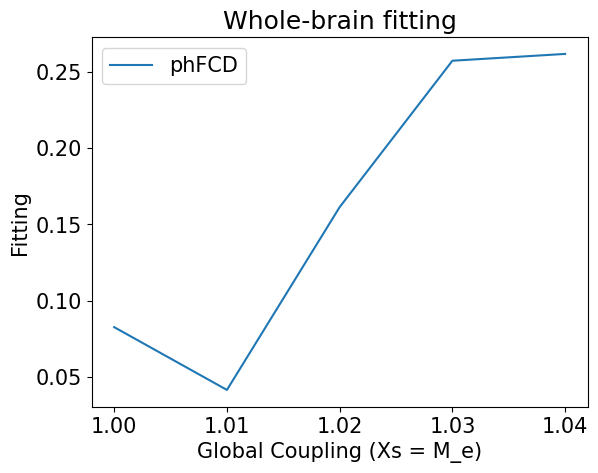

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject4/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject5/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(1.4600000000000004) = 0.2852500824286208
#####################################################


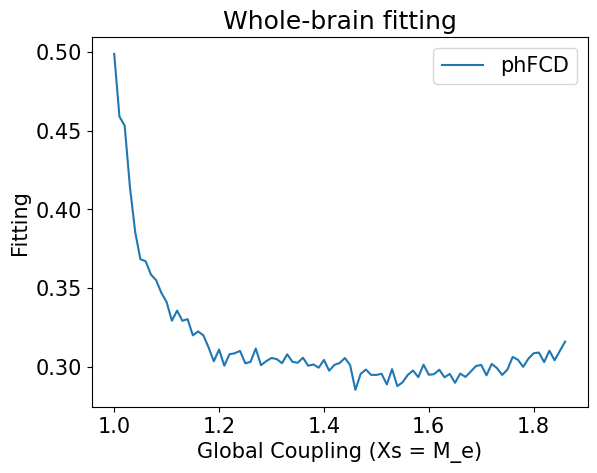

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject5/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject6/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(1.03) = 0.059498758342421576
#####################################################


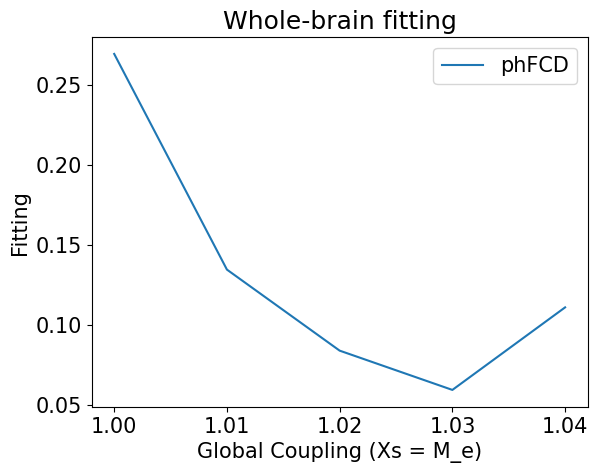

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject6/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject7/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(1.01) = 0.07537704697741698
#####################################################


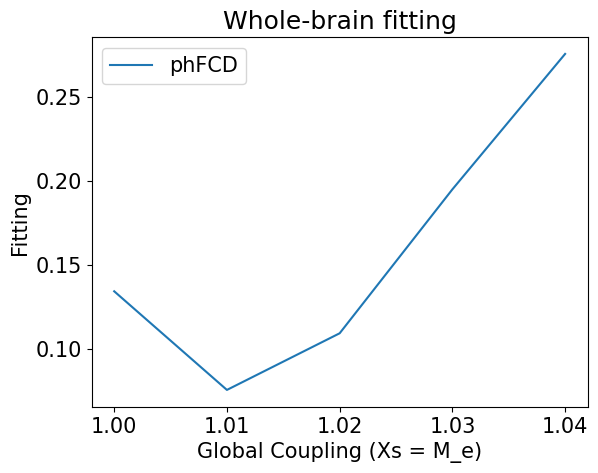

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject7/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject8/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(1.02) = 0.1062322489242008
#####################################################


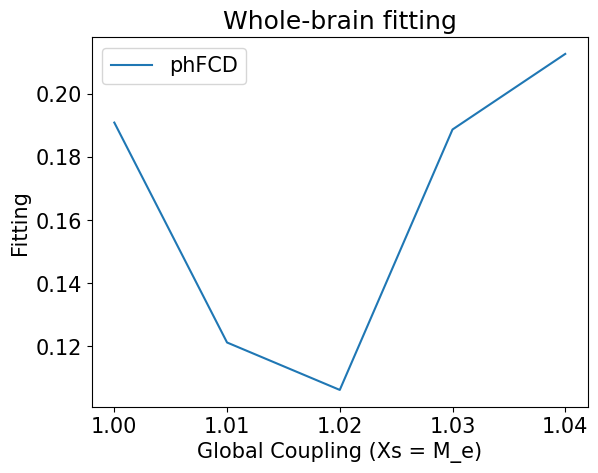

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject8/J_Optim.mat)
Loading Datos/Results/Results_Me_SOCIAL/Subject9/DecoEtAl2018_fneuro.mat


#####################################################
 Min phFCD(1.02) = 0.1084545512390101
#####################################################


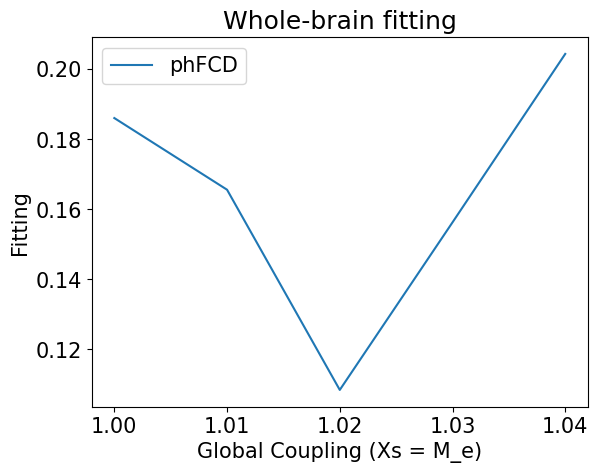

Saving J...
DONE!!! (file: Datos/Results/Results_Me_SOCIAL/Subject9/J_Optim.mat)


In [16]:
import Tests.Deco2018.plot as fig_optim
import numpy as np
import scipy.io as sio
import Tests.Deco2018.prepro as prepro

numSampleSubjects = 10
x= 'M_e'
for i in range(numSampleSubjects):
    filePath = f'Datos/Results/Results_Me_SOCIAL/Subject{i}/DecoEtAl2018_fneuro.mat'
    fig_optim.plot_optim(filePath , x)
    fNeuro = sio.loadmat(filePath)
    Xs = fNeuro[x].flatten()
    phFCD_fitt = fNeuro['phFCD_fitt'].flatten()
    minphFCD = Xs[np.argmin(phFCD_fitt)]
    prepro.save_J(M_i_optim= 1, M_e_optim=minphFCD, G_optim=6.3, Path=f'Datos/Results/Results_Me_SOCIAL/Subject{i}/')

## Estadisticas

### P_Values para M_e


Averages and Std Dev:
GAMBLING: avg=1.0470000000000002, stdev=0.06277738446287809, len=10
REST: avg=1.002, stdev=0.016000000000000014, len=10
SOCIAL: avg=1.0710000000000002, stdev=0.13758270240113776, len=10

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GAMBLING vs. REST: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.683e-02 (ns) U_stat=7.950e+01
REST vs. SOCIAL: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.477e-02 U_stat=2.700e+01
GAMBLING vs. SOCIAL: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.189e-01 U_stat=5.700e+01


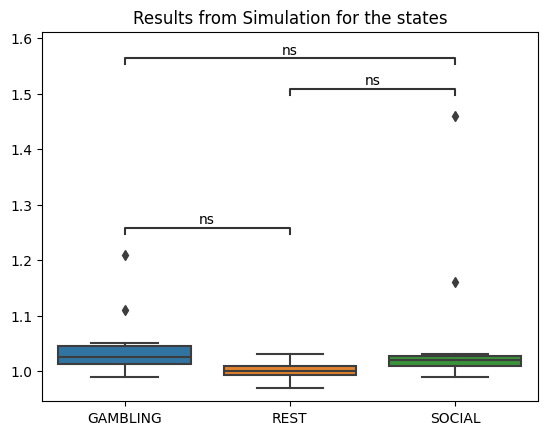

In [5]:
import WholeBrain.Utils.p_values as p_values
import numpy as np
import scipy.io as sio
   
    
# Diccionario para almacenar las matrices promedio de cada estado
resultados = {}

# Estados de interés
estados = ['GAMBLING', 'REST', 'SOCIAL']

for estado in estados:
    # Lista para almacenar las matrices de cada sujeto
    matrices = []

    # Ruta base de los archivos para el estado actual
    base_path = f'Datos/Results/Results_Me_{estado}/'

    # Leer las matrices de los archivos y almacenarlas en la lista
    for subject in range(10):
        ruta_archivo = base_path + f'Subject{subject}/DecoEtAl2018_fneuro.mat'
        fNeuro = sio.loadmat(ruta_archivo) 
        Xs = fNeuro['M_e'].flatten()
        phFCD_fitt = fNeuro['phFCD_fitt'].flatten()
        minphFCD = Xs[np.argmin(phFCD_fitt)]
        matrices.append(minphFCD)

    # Convertir la lista de matrices en un arreglo numpy
    matrices = np.array(matrices)
    
    # Almacenar la matriz promedio del estado actual en el diccionario de resultados
    resultados[estado] = matrices.flatten()
    
# Calcular las estadisticas
p_values.plotComparisonAcrossLabels2(resultados, columnLables=estados, graphLabel=f'Results from Simulation for the states')

#print('done!')      

### P_Values para Vector de J


Averages and Std Dev:
GAMBLING: avg=2.399032755174478, stdev=0.03162504752558344, len=10
REST: avg=2.407074416973894, stdev=0.013836530755027877, len=10
SOCIAL: avg=2.3929945088244966, stdev=0.03845427506989442, len=10

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GAMBLING vs. REST: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.708e-01 U_stat=4.200e+01
REST vs. SOCIAL: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.000e+00 U_stat=5.000e+01
GAMBLING vs. SOCIAL: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.776e-01 U_stat=5.600e+01


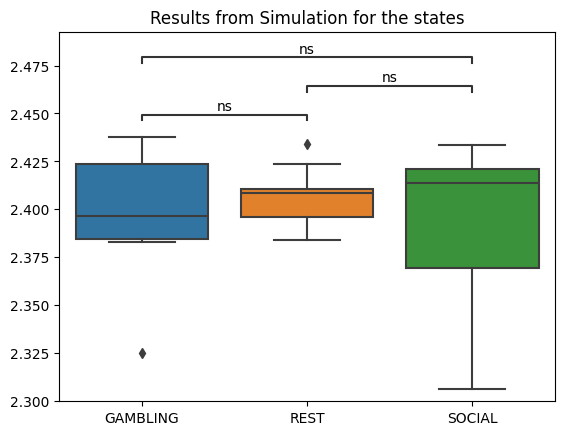

In [2]:
import WholeBrain.Utils.p_values as p_values
import numpy as np
import scipy.io as sio

# Diccionario para almacenar las matrices promedio de cada estado
resultados = {}

# Estados de interés
estados = ['GAMBLING', 'REST', 'SOCIAL']

for estado in estados:
    # Lista para almacenar las matrices de cada sujeto
    matrices = []

    # Ruta base de los archivos para el estado actual
    base_path = f'Datos/Results/Results_Me_{estado}/'

    # Leer las matrices de los archivos y almacenarlas en la lista
    for subject in range(10):
        ruta_archivo = base_path + f'Subject{subject}/J_Optim.mat'
        matriz_dict = sio.loadmat(ruta_archivo)  # Cargar el archivo .mat como un diccionario
        matriz = matriz_dict['J']  # Obtener la matriz del diccionario
        matrices.append(matriz)

    # Convertir la lista de matrices en un arreglo numpy
    matrices = np.array(matrices)

    # Calcular el promedio a lo largo de las columnas
    matriz_promedio = np.mean(matrices, axis=2)
    
    # Almacenar la matriz promedio del estado actual en el diccionario de resultados
    resultados[estado] = matriz_promedio.flatten()
    
# Calcular las estadisticas
p_values.plotComparisonAcrossLabels2(resultados, columnLables=estados, graphLabel=f'Results from Simulation for the states')

#print('done!')  